In [1]:
# %matplotlib inline
# %matplotlib widget
# %matplotlib notebook

import warnings
warnings.filterwarnings(action='ignore')

import os
import numpy as np
import tensorflow as tf
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R3d
import imageio
from PIL import Image
import time
import importlib
import glob
from scipy.ndimage import gaussian_filter
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import metrics
from scipy.spatial import distance_matrix,distance
from scipy.cluster import hierarchy

import dynamics_3d as dn3d
import animation_generation as angn
import optical_signal as opsg
import predefined_weights as pdwt
import samples_generation as smgn
import flow_field as flfd
import helper_functions as hpfn
import helper_functions_baohua as hpfnbz

In [2]:
figure_path = '../results/FiguresForPaper/Figure_3/'

## Distribution of velocities

In [13]:
importlib.reload(hpfnbz)

set_number = 1001
data_path = '/Volumes/Baohua/data_on_hd/loom/multi_lplc2_scal200_recent_new3/set_{}/'.format(set_number)
# data_path = '/Volumes/Baohua/data_on_hd/loom/set_{}/'.format(set_number)
data_types = ['hit','miss','retreat','rotation']
save_path = data_path+'/train_test_set'
N_train,N_test,X_training,y_training,X_testing,y_testing = hpfnbz.get_velocity_train_test(data_path,data_types)
print(N_train)
print(N_test)

[3000 1000 1000 1000]
[1500  500  500  500]


In [14]:
print(X_training.shape)
print(y_training.shape)

(6000, 1)
(6000, 1)


(3000,) (1000,) (1000,) (1000,)


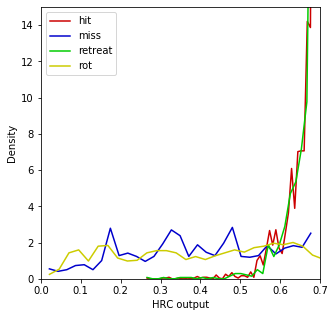

In [15]:
%matplotlib inline
importlib.reload(hpfnbz)

arr_list0 = [X_training.max(axis=1)[:N_train[0]],\
             X_training.max(axis=1)[N_train[0]:N_train[0]+N_train[1]],\
             X_training.max(axis=1)[N_train[0]+N_train[1]:N_train[0]+N_train[1]+N_train[2]],
             X_training.max(axis=1)[N_train[0]+N_train[1]+N_train[2]:]]
print(arr_list0[0].shape,arr_list0[1].shape,arr_list0[2].shape,arr_list0[3].shape)
arr_list = []
for arr in arr_list0:
    arr_list.append(arr[arr!=0])
color_list = [[0.8,0,0],[0,0,0.8],[0,0.8,0],[0.8,0.8,0]]
legend_list = ['hit','miss','retreat','rot']
y_scal = 'linear'
xl = 0.
xu = 0.7
yl = 0.
yu = 15.
fig = hpfnbz.plot_all_hists(arr_list,color_list,legend_list,y_scal,xl,xu,yl,yu)
# fig.savefig('../results/FiguresForPaper/Figure_2/distribution_train_hit_retreat.png')

# arr_list0 = [X_testing.max(axis=1)[:N_test[0]],\
#              X_testing.max(axis=1)[N_test[0]:N_test[0]+N_test[1]],\
#              X_testing.max(axis=1)[N_test[0]+N_test[1]:N_test[0]+N_test[1]+N_test[2]],
#              X_testing.max(axis=1)[N_test[0]+N_test[1]+N_test[2]:]]
# print(arr_list0[0].shape,arr_list0[1].shape,arr_list0[2].shape,arr_list0[3].shape)
# arr_list = []
# for arr in arr_list0:
#     arr_list.append(arr[arr!=0])
# color_list = [[0.8,0,0],[0,0,0.8],[0,0.8,0],[0.8,0.8,0]]
# legend_list = ['hit','miss','retreat','rot']
# y_scal = 'linear'
# xl = 0.
# xu = 0.7
# yl = 0.
# yu = 15.
# fig = hpfnbz.plot_all_hists(arr_list,color_list,legend_list,y_scal,xl,xu,yl,yu)
# fig.savefig('../results/FiguresForPaper/Figure_2/distribution_test_hit_retreat.png')


(3000, 1) (1000, 1) (1000, 1) (1000, 1)


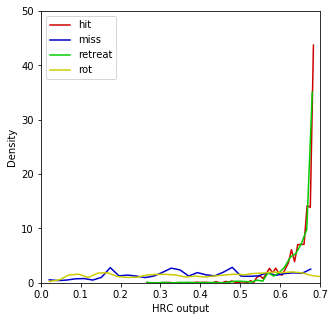

(1500, 1) (500, 1) (500, 1) (500, 1)


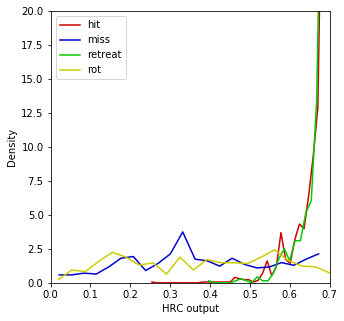

In [16]:
%matplotlib inline
importlib.reload(hpfnbz)

arr_list0 = [X_training[:N_train[0]],\
             X_training[N_train[0]:N_train[0]+N_train[1]],\
             X_training[N_train[0]+N_train[1]:N_train[0]+N_train[1]+N_train[2]],
             X_training[N_train[0]+N_train[1]+N_train[2]:]]
print(arr_list0[0].shape,arr_list0[1].shape,arr_list0[2].shape,arr_list0[3].shape)
arr_list = []
for arr in arr_list0:
    arr_list.append(arr[arr!=0])
color_list = [[0.8,0,0],[0,0,0.8],[0,0.8,0],[0.8,0.8,0]]
legend_list = ['hit','miss','retreat','rot']
y_scal = 'linear'
xl = 0.
xu = 0.7
yl = 0.
yu = 50.
fig = hpfnbz.plot_all_hists(arr_list,color_list,legend_list,y_scal,xl,xu,yl,yu)
# fig.savefig('../results/FiguresForPaper/Figure_2/distribution_train_L4_scal200_Q25_2.png')

arr_list0 = [X_testing[:N_test[0]],\
             X_testing[N_test[0]:N_test[0]+N_test[1]],\
             X_testing[N_test[0]+N_test[1]:N_test[0]+N_test[1]+N_test[2]],
             X_testing[N_test[0]+N_test[1]+N_test[2]:]]
print(arr_list0[0].shape,arr_list0[1].shape,arr_list0[2].shape,arr_list0[3].shape)
arr_list = []
for arr in arr_list0:
    arr_list.append(arr[arr!=0])
color_list = [[0.8,0,0],[0,0,0.8],[0,0.8,0],[0.8,0.8,0]]
legend_list = ['hit','miss','retreat','rot']
y_scal = 'linear'
xl = 0.
xu = 0.7
yl = 0.
yu = 20.
fig = hpfnbz.plot_all_hists(arr_list,color_list,legend_list,y_scal,xl,xu,yl,yu)
# fig.savefig('../results/FiguresForPaper/Figure_2/distribution_test_L4_scal200_Q25_2.png')


# HRC and tuning curve

In [16]:
figure_path = '../results/FiguresForPaper/HRC_tuning_curve/'
if not os.path.exists(figure_path):
    os.makedirs(figure_path)

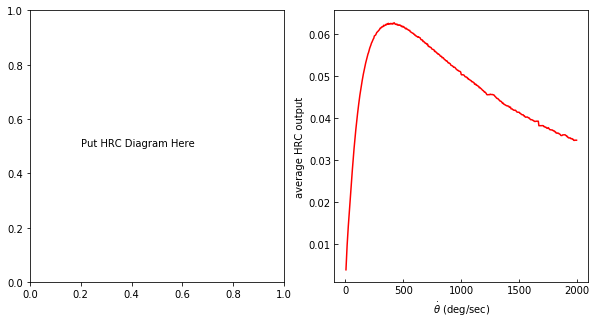

In [17]:
# gridspec inside gridspec
def get_angular_velocity(R,V):
    return 1./(2.*(R/V))*(180/np.pi)*1e-3

def get_angular_velocity2(R,V):
    return 1./((1.+1/np.tan(np.pi/6))*(R/V))*(180/np.pi)*1e-3

R = 1
save_path = '../results/timescale_tuning_curve/'
ave_hrc_1 = np.load(save_path+'ave_hrc_1_L4_0.001.npy')


fig = plt.figure(figsize=(10,5))
gs0 = gridspec.GridSpec(1, 2, figure=fig)

# A, the HRC diagram
ax1 = fig.add_subplot(gs0[0,0])
ax1.text(0.2,0.5,'Put HRC Diagram Here')

# B, HRC tuning curve
ax2 = fig.add_subplot(gs0[0,1])
ax2.plot(np.arange(1,400)*5,ave_hrc_1[0,:],'r',alpha=1)
ax2.set_xlabel(r'$\dot{\theta}$ (deg/sec)')
ax2.set_ylabel('average HRC output')
ax2.tick_params(direction='in')

filename = figure_path+'HRC_tuning_curve.eps'
fig.savefig(filename,bbox_inches='tight')

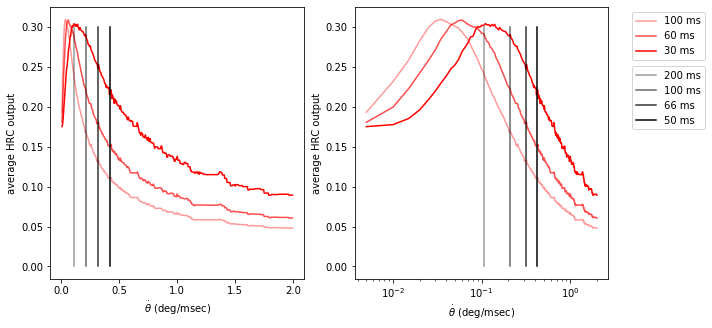

In [6]:
def get_angular_velocity(R,V):
    return 1./(2.*(R/V))*(180/np.pi)*1e-3

def get_angular_velocity2(R,V):
    return 1./((1.+1/np.tan(np.pi/6))*(R/V))*(180/np.pi)*1e-3

R = 1
save_path = '../results/timescale_tuning_curve/'

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

plotted = []
ave_hrc_1 = np.load(save_path+'ave_hrc_3_L4_0.001.npy')
p = ax1.plot(np.arange(1,400)*5/1000.,ave_hrc_1[1,:],'r',alpha=0.4)
plotted.append(p[0])
ave_hrc_2 = np.load(save_path+'ave_hrc_2_L4_0.001.npy')
p = ax1.plot(np.arange(1,400)*5/1000.,ave_hrc_2[1,:],'r',alpha=0.7)
plotted.append(p[0])
ave_hrc_3 = np.load(save_path+'ave_hrc_1_L4_0.001.npy')
p = ax1.plot(np.arange(1,400)*5/1000.,ave_hrc_3[1,:],'r',alpha=1)
plotted.append(p[0])

alphas = [0.4,0.6,0.8,1.0]
for ind,V in enumerate([5*R,10*R,15*R,20*R]):
    theta_dot = get_angular_velocity2(R,V)
    p = ax1.plot([theta_dot,theta_dot],[0,0.3],'k',alpha=alphas[ind])
    plotted.append(p[0])
    
ax1.set_xlabel(r'$\dot{\theta}$ (deg/msec)')
ax1.set_ylabel('average HRC output')
# l1 = ax1.legend(plotted[:3], ['100 ms', '60 ms', '30 ms'], loc='upper right')
# l2 = ax1.legend(plotted[-4:], ['200 ms', '100 ms', '66 ms', '50 ms'], loc='lower right')
# ax1.add_artist(l1)

plotted = []
ave_hrc_1 = np.load(save_path+'ave_hrc_3_L4_0.001.npy')
p = ax2.plot(np.arange(1,400)*5/1000.,ave_hrc_1[1,:],'r',alpha=0.4)
plotted.append(p[0])
ave_hrc_2 = np.load(save_path+'ave_hrc_2_L4_0.001.npy')
p = ax2.plot(np.arange(1,400)*5/1000.,ave_hrc_2[1,:],'r',alpha=0.7)
plotted.append(p[0])
ave_hrc_3 = np.load(save_path+'ave_hrc_1_L4_0.001.npy')
p = ax2.plot(np.arange(1,400)*5/1000.,ave_hrc_3[1,:],'r',alpha=1)
plotted.append(p[0])

alphas = [0.4,0.6,0.8,1.0]
for ind,V in enumerate([5*R,10*R,15*R,20*R]):
    theta_dot = get_angular_velocity2(R,V)
    p = ax2.plot([theta_dot,theta_dot],[0,0.3],'k',alpha=alphas[ind])
    plotted.append(p[0])
    
ax2.set_xlabel(r'$\dot{\theta}$ (deg/msec)')
ax2.set_ylabel('average HRC output')
ax2.set_xscale('log')
l1 = ax2.legend(plotted[:3], ['100 ms', '60 ms', '30 ms'], loc='upper right',bbox_to_anchor=(1.4, 1))
l2 = ax2.legend(plotted[-4:], ['200 ms', '100 ms', '66 ms', '50 ms'],loc='upper right',bbox_to_anchor=(1.4, 0.8))
ax2.add_artist(l1)

plt.savefig('../results/FiguresForPaper/Figure_2/tuning_curve_max.pdf',bbox_inches='tight')
plt.show()